# **Car Accident Data**
The dataset provides detailed records of road accidents that occurred during January 2021. It includes information such as the accident date, day of the week, junction control, accident severity, geographical coordinates, lighting and weather conditions, vehicle details, and more. The data is valuable for analyzing and understanding the factors contributing to road accidents in this urban area, aiding in the development of strategies for improved road safety.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os

filepath = '/content/gdrive/MyDrive/למידה חישובית/Road Accident Data.csv'
data = pd.read_csv(filepath)
print(data.shape)
data.head()

(307973, 21)


Accident_Index Accident Date Day_of_Week          Junction_Control  \
0  200901BS70001      1/1/2021    Thursday  Give way or uncontrolled   
1  200901BS70002      1/5/2021      Monday  Give way or uncontrolled   
2  200901BS70003      1/4/2021      Sunday  Give way or uncontrolled   
3  200901BS70004      1/5/2021      Monday       Auto traffic signal   
4  200901BS70005      1/6/2021     Tuesday       Auto traffic signal   

           Junction_Detail Accident_Severity   Latitude  \
0  T or staggered junction           Serious  51.512273   
1               Crossroads           Serious  51.514399   
2  T or staggered junction            Slight  51.486668   
3  T or staggered junction           Serious  51.507804   
4               Crossroads           Serious  51.482076   

        Light_Conditions Local_Authority_(District) Carriageway_Hazards  ...  \
0               Daylight     Kensington and Chelsea                 NaN  ...   
1               Daylight     Kensington and Chelsea                 NaN  ...   
2               Daylight     Kensington and Chelsea                 NaN  ...   
3               Daylight     Kensington and Chelsea                 NaN  ...   
4  Darkness - lights lit     Kensington and Chelsea                 NaN  ...   

   Number_of_Casualties  Number_of_Vehicles         Police_Force  \
0                     1                   2  Metropolitan Police   
1                    11                   2  Metropolitan Police   
2                     1                   2  Metropolitan Police   
3                     1                   2  Metropolitan Police   
4                     1                   2  Metropolitan Police   

  Road_Surface_Conditions           Road_Type Speed_limit   Time  \
0                     Dry      One way street          30  15:11   
1             Wet or damp  Single carriageway          30  10:59   
2                     Dry  Single carriageway          30  14:19   
3            Frost or ice  Single carriageway          30   8:10   
4                     Dry  Single carriageway          30  17:25   

  Urban_or_Rural_Area  Weather_Conditions           Vehicle_Type  
0               Urban  Fine no high winds                    Car  
1               Urban  Fine no high winds  Taxi/Private hire car  
2               Urban  Fine no high winds  Taxi/Private hire car  
3               Urban               Other  Motorcycle over 500cc  
4               Urban  Fine no high winds                    Car  

[5 rows x 21 columns]

In [ ]:
#The number of each Accident_Severity- the target
print(data["Accident_Severity"].value_counts())

Accident_Severity
Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: count, dtype: int64


# Explanation:

**Accident_Index:** A unique identifier for each accident record.

**Accident Date:** The date on which the accident occurred (format: DD/MM/YYYY).

**Day_of_Week:** The day of the week when the accident took place.

**Junction_Control:** Describes the type of junction control at the accident location (e.g., "Give way or uncontrolled").

**Junction_Detail:** Provides additional details about the junction where the accident occurred (e.g., "T or staggered junction").

**Accident_Severity:** Indicates the severity of the accident (e.g., "Serious").

**Latitude:** The geographic latitude of the accident location.

**Light_Conditions:** Describes the lighting conditions at the time of the accident (e.g., "Daylight").

**Local_Authority_(District):** The local authority district where the accident occurred.

**Carriageway_Hazards:** Describes any hazards present on the carriageway at the time of the accident (e.g., "None").

**Longitude:** The geographic longitude of the accident location.

**Number_of_Casualties:** The total number of casualties involved in the accident.

**Number_of_Vehicles:** The total number of vehicles involved in the accident.

**Police_Force:** The police force that handled the accident.

**Road_Surface_Conditions:** Describes the surface conditions of the road at the time of the accident (e.g., "Dry").

**Road_Type:** Specifies the type of road where the accident occurred (e.g., "One way street").

**Speed_limit:** The speed limit applicable to the road where the accident occurred.

**Time:** The time of day when the accident happened (format: HH:MM).

**Urban_or_Rural_Area:** Indicates whether the accident occurred in an urban or rural area.

**Weather_Conditions:** Describes the weather conditions at the time of the accident (e.g., "Fine no high winds").

**Vehicle_Type:** Specifies the type of vehicle involved in the accident (e.g., "Car," "Taxi/Private hire car").

## Cleaning the dataset

*Remove unnecessary columns


In [ ]:
data.drop(['Accident_Index', 'Police_Force', 'Accident Date', 'Local_Authority_(District)', 'Carriageway_Hazards'], axis=1, inplace=True)
print(data.shape)
data.head()

(307973, 16)


Day_of_Week          Junction_Control          Junction_Detail  \
0    Thursday  Give way or uncontrolled  T or staggered junction   
1      Monday  Give way or uncontrolled               Crossroads   
2      Sunday  Give way or uncontrolled  T or staggered junction   
3      Monday       Auto traffic signal  T or staggered junction   
4     Tuesday       Auto traffic signal               Crossroads   

  Accident_Severity   Latitude       Light_Conditions  Longitude  \
0           Serious  51.512273               Daylight  -0.201349   
1           Serious  51.514399               Daylight  -0.199248   
2            Slight  51.486668               Daylight  -0.179599   
3           Serious  51.507804               Daylight  -0.203110   
4           Serious  51.482076  Darkness - lights lit  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11                   2             Wet or damp   
2                     1                   2                     Dry   
3                     1                   2            Frost or ice   
4                     1                   2                     Dry   

            Road_Type  Speed_limit   Time Urban_or_Rural_Area  \
0      One way street           30  15:11               Urban   
1  Single carriageway           30  10:59               Urban   
2  Single carriageway           30  14:19               Urban   
3  Single carriageway           30   8:10               Urban   
4  Single carriageway           30  17:25               Urban   

   Weather_Conditions           Vehicle_Type  
0  Fine no high winds                    Car  
1  Fine no high winds  Taxi/Private hire car  
2  Fine no high winds  Taxi/Private hire car  
3               Other  Motorcycle over 500cc  
4  Fine no high winds                    Car

*Remove rows with any missing values

In [ ]:
data = data.dropna()
print(data.shape)
data.head()

(300495, 16)


Day_of_Week          Junction_Control          Junction_Detail  \
0    Thursday  Give way or uncontrolled  T or staggered junction   
1      Monday  Give way or uncontrolled               Crossroads   
2      Sunday  Give way or uncontrolled  T or staggered junction   
3      Monday       Auto traffic signal  T or staggered junction   
4     Tuesday       Auto traffic signal               Crossroads   

  Accident_Severity   Latitude       Light_Conditions  Longitude  \
0           Serious  51.512273               Daylight  -0.201349   
1           Serious  51.514399               Daylight  -0.199248   
2            Slight  51.486668               Daylight  -0.179599   
3           Serious  51.507804               Daylight  -0.203110   
4           Serious  51.482076  Darkness - lights lit  -0.173445   

   Number_of_Casualties  Number_of_Vehicles Road_Surface_Conditions  \
0                     1                   2                     Dry   
1                    11                   2             Wet or damp   
2                     1                   2                     Dry   
3                     1                   2            Frost or ice   
4                     1                   2                     Dry   

            Road_Type  Speed_limit   Time Urban_or_Rural_Area  \
0      One way street           30  15:11               Urban   
1  Single carriageway           30  10:59               Urban   
2  Single carriageway           30  14:19               Urban   
3  Single carriageway           30   8:10               Urban   
4  Single carriageway           30  17:25               Urban   

   Weather_Conditions           Vehicle_Type  
0  Fine no high winds                    Car  
1  Fine no high winds  Taxi/Private hire car  
2  Fine no high winds  Taxi/Private hire car  
3               Other  Motorcycle over 500cc  
4  Fine no high winds                    Car

*Balance the data and deleting 'Fetal' and 'Fatal' samples in order to create balanced data

In [ ]:
from sklearn.utils import resample

# Assuming df is your dataframe
# Remove rows with 'Fetal' class
df_balanced = data[data['Accident_Severity'] != 'Fetal']
df_balanced = df_balanced[df_balanced['Accident_Severity'] != 'Fatal']

# Balance the remaining classes
# Separate majority and minority classes
majority_class = df_balanced[df_balanced['Accident_Severity'] == 'Slight']
minority_class = df_balanced[df_balanced['Accident_Severity'] == 'Serious']

# Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match minority class
                                random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([majority_downsampled, minority_class])

# Shuffle the data to mix the classes
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check the class distribution
print(df_balanced['Accident_Severity'].value_counts())

Accident_Severity
Slight     40084
Serious    40084
Name: count, dtype: int64


In [ ]:
data=df_balanced
print(data.shape)
data.head()

(80168, 16)


Day_of_Week              Junction_Control  \
261505    Thursday      Give way or uncontrolled   
71904    Wednesday  Data missing or out of range   
293402   Wednesday      Give way or uncontrolled   
17407     Saturday      Give way or uncontrolled   
5307        Sunday           Auto traffic signal   

                            Junction_Detail Accident_Severity   Latitude  \
261505                       Other junction            Slight  51.508416   
71904   Not at junction or within 20 metres           Serious  52.752179   
293402              T or staggered junction           Serious  50.984081   
17407                            Roundabout            Slight  51.491816   
5307                T or staggered junction            Slight  51.512397   

             Light_Conditions  Longitude  Number_of_Casualties  \
261505  Darkness - lights lit   0.283722                     1   
71904                Daylight  -2.224133                     3   
293402               Daylight  -3.088248                     3   
17407                Daylight  -0.282393                     1   
5307                 Daylight  -0.035317                     2   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
261505                   1                    Snow  Single carriageway   
71904                    2                     Dry  Single carriageway   
293402                   2                     Dry  Single carriageway   
17407                    2             Wet or damp          Roundabout   
5307                     2                     Dry  Single carriageway   

        Speed_limit   Time Urban_or_Rural_Area     Weather_Conditions  \
261505           30  17:45               Urban                  Other   
71904            60  15:56               Rural     Fine no high winds   
293402           60  17:46               Rural     Fine no high winds   
17407            30  15:40               Urban  Raining no high winds   
5307             30  13:53               Urban     Fine no high winds   

                                 Vehicle_Type  
261505                                    Car  
71904   Motorcycle over 125cc and up to 500cc  
293402   Bus or coach (17 or more pass seats)  
17407    Bus or coach (17 or more pass seats)  
5307                                      Car

In [ ]:
# Number of rows
print("number of rows:" , data.shape[0])

# Column names
print("Column names:" , data.columns.tolist())

# Data types
print("Data types:\n", data.dtypes)

number of rows: 80168
Column names: ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
Data types:
 Day_of_Week                 object
Junction_Control            object
Junction_Detail             object
Accident_Severity           object
Latitude                   float64
Light_Conditions            object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Speed_limit                  int64
Time                        object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object


In [ ]:
data.describe()

Latitude     Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  80168.000000  80168.000000          80168.000000        80168.000000   
mean      52.519041     -1.364025              1.396979            1.769484   
std        1.369944      1.355573              0.889894            0.734761   
min       50.021621     -7.516225              1.000000            1.000000   
25%       51.486449     -2.244114              1.000000            1.000000   
50%       52.257117     -1.333834              1.000000            2.000000   
75%       53.436493     -0.210243              1.000000            2.000000   
max       60.598055      1.755885             42.000000           19.000000   

        Speed_limit  
count  80168.000000  
mean      39.619112  
std       14.306430  
min       10.000000  
25%       30.000000  
50%       30.000000  
75%       50.000000  
max       70.000000

##Diagrams

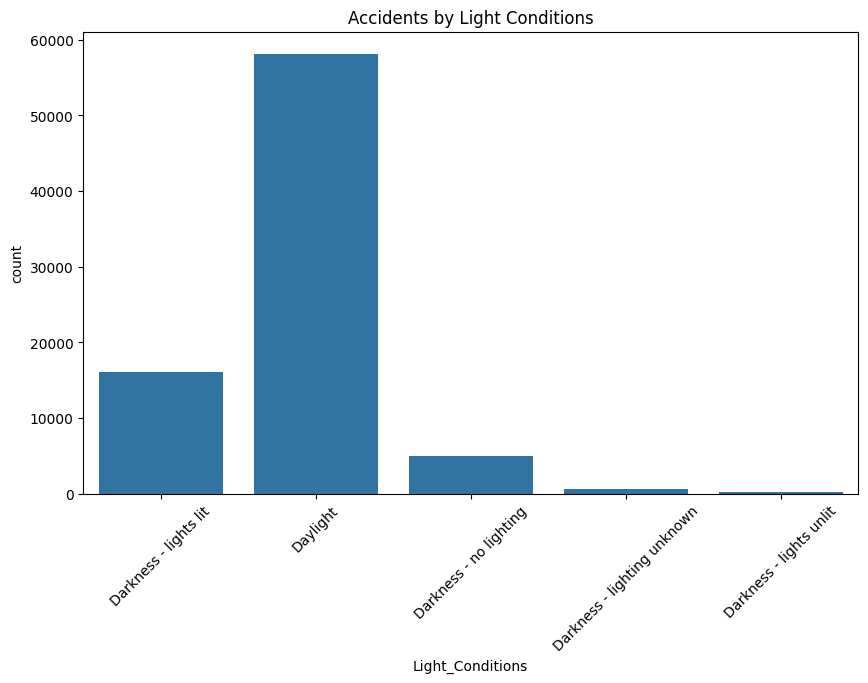

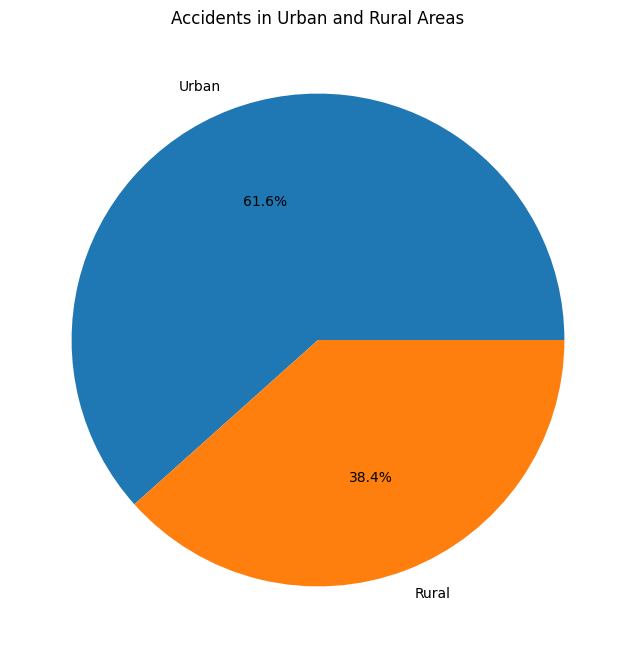

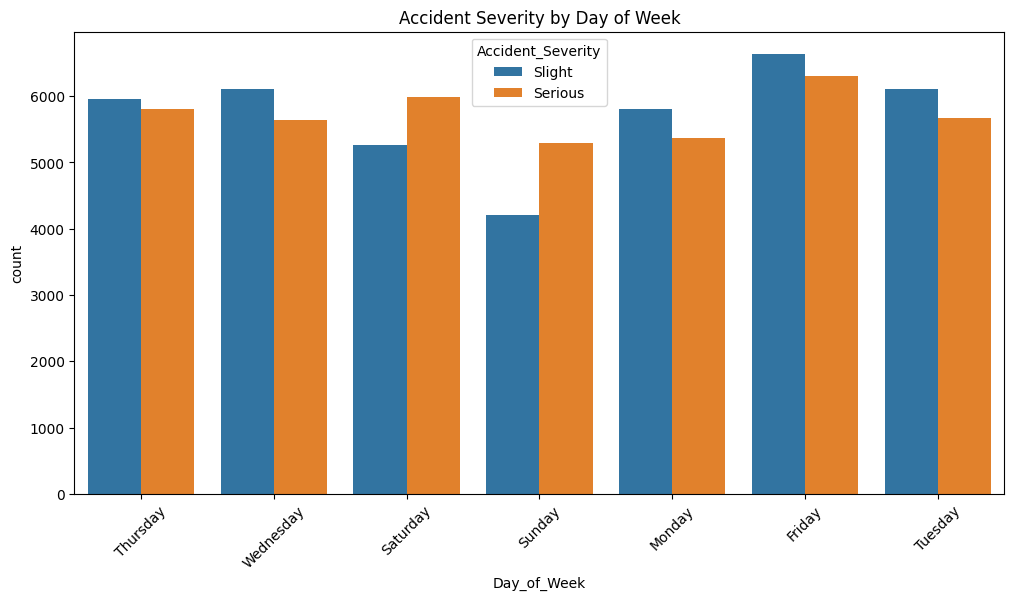

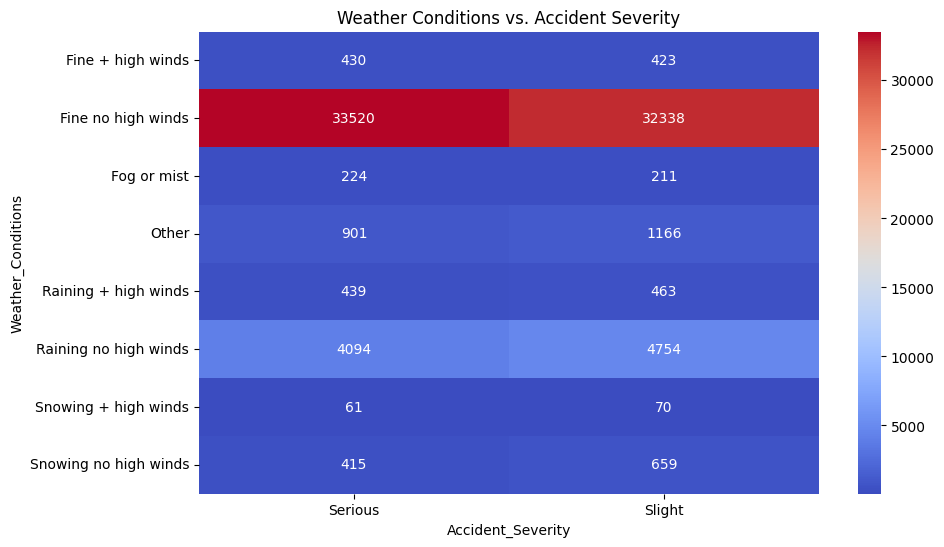

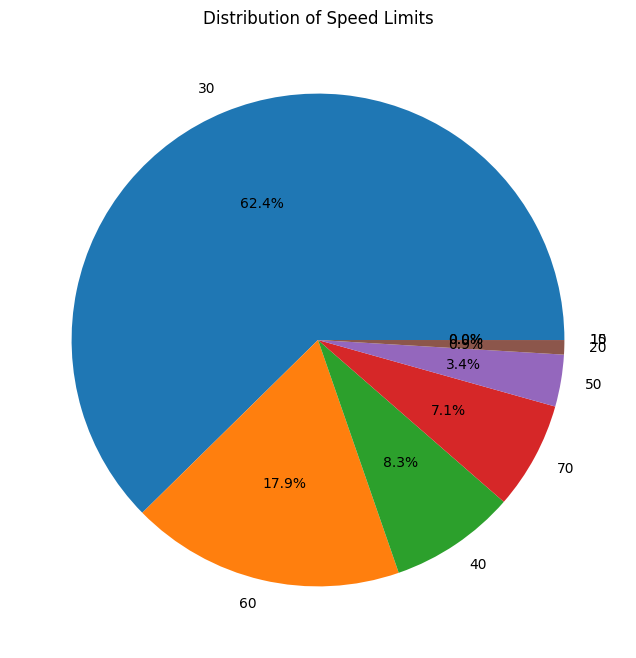

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for Light Conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='Light_Conditions', data=data)
plt.title('Accidents by Light Conditions')
plt.xticks(rotation=45)
plt.show()

# Pie chart for Urban_or_Rural_Area
plt.figure(figsize=(8, 8))
data['Urban_or_Rural_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Accidents in Urban and Rural Areas')
plt.ylabel('')
plt.show()

# Stacked bar chart for Accident_Severity by Day_of_Week
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=data)
plt.title('Accident Severity by Day of Week')
plt.xticks(rotation=45)
plt.show()

# Heatmap for Weather_Conditions and Accident_Severity
plt.figure(figsize=(10, 6))
weather_accident_pivot = data.pivot_table(index='Weather_Conditions', columns='Accident_Severity', aggfunc='size', fill_value=0)
sns.heatmap(weather_accident_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Weather Conditions vs. Accident Severity')
plt.show()

# Pie chart for Speed Limit
plt.figure(figsize=(8, 8))
data['Speed_limit'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Speed Limits')
plt.ylabel('')
plt.show()

##Encoding the data

*Changing the data type in 'Time' column from continuous to discrete

In [ ]:
for index, row in data.iterrows():
    data.at[index, 'Time'] = int(row['Time'].split(':')[0])
    if data.at[index, 'Time'] == 0:
      data.at[index, 'Time'] = 24
data['Time'] = data['Time'].astype(int)
print(data['Time'])

261505    17
71904     15
293402    17
17407     15
5307      13
          ..
183402    20
113884    17
282130    22
175764    19
268572    18
Name: Time, Length: 80168, dtype: int64


*change the name of 'Urban_or_Rural_Area' column to 'Is_Urban'

In [ ]:
data.rename(columns={'Urban_or_Rural_Area': 'Is_Urban'}, inplace=True)

*Encoding 'Urban_or_Rural_Area' column

In [ ]:
#urban=1, rural=0
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
data['Is_Urban'] = lb.fit_transform(data['Is_Urban'])
print(data['Is_Urban'])

261505    1
71904     0
293402    0
17407     1
5307      1
         ..
183402    1
113884    1
282130    0
175764    1
268572    1
Name: Is_Urban, Length: 80168, dtype: int64


*Encoding the target column 'Accident_Severity'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Sample dataset
category = ['Slight', 'Serious']

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[category])

data_reshaped=data['Accident_Severity'].values.reshape(-1,1)

# Fit and transform the data
data['Accident_Severity'] = encoder.fit_transform(data_reshaped)

data['Accident_Severity'] = data['Accident_Severity'].astype(int)
# Display the encoded data
data.head()


Day_of_Week              Junction_Control  \
261505    Thursday      Give way or uncontrolled   
71904    Wednesday  Data missing or out of range   
293402   Wednesday      Give way or uncontrolled   
17407     Saturday      Give way or uncontrolled   
5307        Sunday           Auto traffic signal   

                            Junction_Detail  Accident_Severity   Latitude  \
261505                       Other junction                  0  51.508416   
71904   Not at junction or within 20 metres                  1  52.752179   
293402              T or staggered junction                  1  50.984081   
17407                            Roundabout                  0  51.491816   
5307                T or staggered junction                  0  51.512397   

             Light_Conditions  Longitude  Number_of_Casualties  \
261505  Darkness - lights lit   0.283722                     1   
71904                Daylight  -2.224133                     3   
293402               Daylight  -3.088248                     3   
17407                Daylight  -0.282393                     1   
5307                 Daylight  -0.035317                     2   

        Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
261505                   1                    Snow  Single carriageway   
71904                    2                     Dry  Single carriageway   
293402                   2                     Dry  Single carriageway   
17407                    2             Wet or damp          Roundabout   
5307                     2                     Dry  Single carriageway   

        Speed_limit  Time  Is_Urban     Weather_Conditions  \
261505           30    17         1                  Other   
71904            60    15         0     Fine no high winds   
293402           60    17         0     Fine no high winds   
17407            30    15         1  Raining no high winds   
5307             30    13         1     Fine no high winds   

                                 Vehicle_Type  
261505                                    Car  
71904   Motorcycle over 125cc and up to 500cc  
293402   Bus or coach (17 or more pass seats)  
17407    Bus or coach (17 or more pass seats)  
5307                                      Car

In [ ]:
# Select the object (string) columns
import numpy as np

mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['Day_of_Week', 'Junction_Control', 'Junction_Detail',
       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [ ]:
for col in categorical_cols:
    unique_values = data[col].unique()
    num_unique_values = data[col].nunique()
    print(f"'{col}': {unique_values} = {num_unique_values}")

'Day_of_Week': ['Thursday' 'Wednesday' 'Saturday' 'Sunday' 'Monday' 'Friday' 'Tuesday'] = 7
'Junction_Control': ['Give way or uncontrolled' 'Data missing or out of range'
 'Auto traffic signal' 'Not at junction or within 20 metres' 'Stop sign'
 'Authorised person' 'Auto traffic sigl'] = 7
'Junction_Detail': ['Other junction' 'Not at junction or within 20 metres'
 'T or staggered junction' 'Roundabout' 'Crossroads'
 'Private drive or entrance' 'More than 4 arms (not roundabout)'
 'Mini-roundabout' 'Slip road'] = 9
'Light_Conditions': ['Darkness - lights lit' 'Daylight' 'Darkness - no lighting'
 'Darkness - lighting unknown' 'Darkness - lights unlit'] = 5
'Road_Surface_Conditions': ['Snow' 'Dry' 'Wet or damp' 'Frost or ice' 'Flood over 3cm. deep'] = 5
'Road_Type': ['Single carriageway' 'Roundabout' 'Dual carriageway' 'Slip road'
 'One way street'] = 5
'Weather_Conditions': ['Other' 'Fine no high winds' 'Raining no high winds'
 'Raining + high winds' 'Snowing no high winds' 'Fine + high w

In [ ]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 52 columns, assuming the original ones are dropped.
# This is quite a few extra columns!
small_num_ohc_cols.sum()

52

why choose 'OneHotEncoder' and not 'get_dummies'? 'OneHotEncoder' is more flexible and can handle a wider range of scenarios, such as working with missing values and unknown categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:

    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)

    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(),
                          index=data_ohc.index,
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)


In [ ]:
data_ohc

Accident_Severity   Latitude  Longitude  Number_of_Casualties  \
261505                  0  51.508416   0.283722                     1   
71904                   1  52.752179  -2.224133                     3   
293402                  1  50.984081  -3.088248                     3   
17407                   0  51.491816  -0.282393                     1   
5307                    0  51.512397  -0.035317                     2   
...                   ...        ...        ...                   ...   
183402                  0  51.506481  -0.264549                     1   
113884                  1  50.786808  -1.082826                     1   
282130                  1  51.416893   0.259020                     2   
175764                  0  51.383896   0.109073                     1   
268572                  0  51.529227  -0.623385                     1   

        Number_of_Vehicles  Speed_limit  Time  Is_Urban  Vehicle_Type_0  \
261505                   1           30    17         1             0.0   
71904                    2           60    15         0             0.0   
293402                   2           60    17         0             0.0   
17407                    2           30    15         1             0.0   
5307                     2           30    13         1             0.0   
...                    ...          ...   ...       ...             ...   
183402                   2           30    20         1             0.0   
113884                   2           30    17         1             0.0   
282130                   1           30    22         0             0.0   
175764                   2           30    19         1             0.0   
268572                   2           30    18         1             0.0   

        Vehicle_Type_1  ...  Road_Surface_Conditions_0  \
261505             0.0  ...                        0.0   
71904              0.0  ...                        1.0   
293402             1.0  ...                        1.0   
17407              1.0  ...                        0.0   
5307               0.0  ...                        1.0   
...                ...  ...                        ...   
183402             0.0  ...                        1.0   
113884             0.0  ...                        0.0   
282130             0.0  ...                        1.0   
175764             0.0  ...                        1.0   
268572             0.0  ...                        1.0   

        Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
261505                        0.0                        0.0   
71904                         0.0                        0.0   
293402                        0.0                        0.0   
17407                         0.0                        0.0   
5307                          0.0                        0.0   
...                           ...                        ...   
183402                        0.0                        0.0   
113884                        0.0                        0.0   
282130                        0.0                        0.0   
175764                        0.0                        0.0   
268572                        0.0                        0.0   

        Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
261505                        1.0                        0.0          0.0   
71904                         0.0                        0.0          0.0   
293402                        0.0                        0.0          0.0   
17407                         0.0                        1.0          0.0   
5307                          0.0                        0.0          0.0   
...                           ...                        ...          ...   
183402                        0.0                        0.0          0.0   
113884                        0.0                        1.0          0.0   
282130                        0.0                        0.0          0

In [ ]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

52

##checking correlation between dependent variables

In [ ]:
# Calculate the correlation values
feature_cols = data_ohc.columns[:-1]
corr_values = data_ohc[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

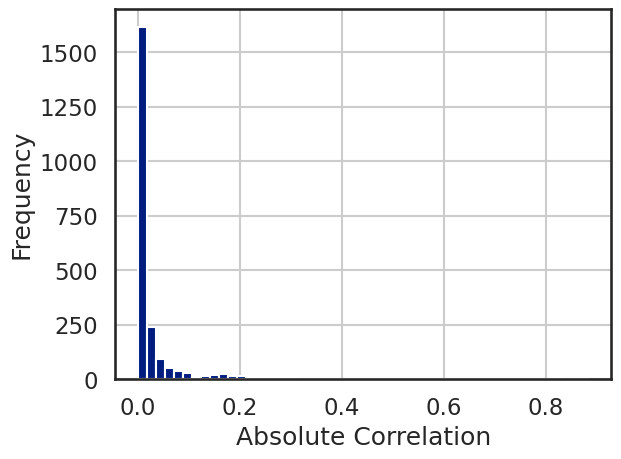

In [ ]:
#A histogram of the absolute value correlations.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

##Checking Skew of the data

In [ ]:
data= data_ohc
y_col = 'Accident_Severity'
feature_cols = [x for x in data.columns if x != y_col]
x_data = data[feature_cols]
y_data = data[y_col]

In [ ]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]
skew_limit = 0.75
skew_vals = x_data[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

Skew
Vehicle_Type_11            57.770741
Junction_Control_1         56.602475
Road_Surface_Conditions_1  27.446883
Junction_Control_0         26.819070
Weather_Conditions_6       24.677802
Vehicle_Type_0             20.360736
Vehicle_Type_5             18.589576
Light_Conditions_2         17.208973
Junction_Control_6         14.195868
Weather_Conditions_2       13.465010
Light_Conditions_0         11.497954
Vehicle_Type_10            11.111280
Vehicle_Type_4             10.978984
Road_Type_4                10.402074
Junction_Detail_1          10.292577
Weather_Conditions_0        9.539274
Vehicle_Type_8              9.516255
Weather_Conditions_4        9.267828
Vehicle_Type_7              8.896889
Junction_Detail_2           8.785415
Road_Surface_Conditions_3   8.510752
Junction_Detail_7           8.469365
Weather_Conditions_7        8.465257
Vehicle_Type_12             7.175137
Road_Type_1                 6.901670
Vehicle_Type_6              6.585102
Vehicle_Type_3              6.554800
Junction_Detail_4           6.088592
Weather_Conditions_3        5.984356
Vehicle_Type_1              5.702498
Junction_Detail_5           5.041382
Road_Surface_Conditions_2   4.985480
Vehicle_Type_9              4.891165
Vehicle_Type_13             4.123787
Road_Type_2                 3.811439
Light_Conditions_3          3.611557
Junction_Detail_6           3.258099
Junction_Control_5          2.881993
Junction_Detail_0           2.811612
Junction_Control_2          2.763015
Weather_Conditions_5        2.486940
Day_of_Week_3               2.361539
Day_of_Week_1               2.081707
Day_of_Week_2               2.071246
Road_Type_0                 2.051298
Day_of_Week_6               1.998815
Day_of_Week_4               1.995154
Day_of_Week_5               1.994451
Day_of_Week_0               1.840644
Light_Conditions_1          1.490665
Road_Surface_Conditions_4   1.085606
Latitude                    0.998871
Junction_Detail_8           0.815674
Road_Surface_Conditions_0  -0.811531
Light_Conditions_4         -1.010434
Road_Type_3                -1.296616
Vehicle_Type_2             -1.340426
Weather_Conditions_1       -1.679175

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    x_data[col] = np.log1p(x_data[col])

##Scaling the data

Using 'MinMaxScaler' when you need to bound the data to a specific range, especially if your data does not follow a normal distribution or if you are using algorithms that require the data to be on a similar scale, such as KNN.

In [ ]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()
x_data = pd.DataFrame(msc.fit_transform(x_data),  # this is an np.array, not a dataframe.
                    columns=x_data.columns)
x_data

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0      0.152478   0.841227               0.00000            0.000000   
1      0.276752   0.570754               0.04878            0.055556   
2      0.099204   0.477559               0.04878            0.055556   
3      0.150800   0.780171               0.00000            0.055556   
4      0.152881   0.806818               0.02439            0.055556   
...         ...        ...                   ...                 ...   
80163  0.152283   0.782096               0.00000            0.055556   
80164  0.079021   0.693844               0.00000            0.055556   
80165  0.143218   0.838563               0.02439            0.000000   
80166  0.139875   0.822391               0.00000            0.055556   
80167  0.154582   0.743395               0.00000            0.055556   

       Speed_limit      Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0         0.333333  0.695652       1.0             0.0             0.0   
1         0.833333  0.608696       0.0             0.0             0.0   
2         0.833333  0.695652       0.0             0.0             1.0   
3         0.333333  0.608696       1.0             0.0             1.0   
4         0.333333  0.521739       1.0             0.0             0.0   
...            ...       ...       ...             ...             ...   
80163     0.333333  0.826087       1.0             0.0             0.0   
80164     0.333333  0.695652       1.0             0.0             0.0   
80165     0.333333  0.913043       0.0             0.0             0.0   
80166     0.333333  0.782609       1.0             0.0             0.0   
80167     0.333333  0.739130       1.0             0.0             0.0   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0                 1.0  ...                        0.0   
1                 0.0  ...                        1.0   
2                 0.0  ...                        1.0   
3                 0.0  ...                        0.0   
4                 1.0  ...                        1.0   
...               ...  ...                        ...   
80163             1.0  ...                        1.0   
80164             1.0  ...                        0.0   
80165             1.0  ...                        1.0   
80166             1.0  ...                        1.0   
80167             1.0  ...                        1.0   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                            0.0                        0.0   
1                            0.0                        0.0   
2                            0.0                        0.0   
3                            0.0                        0.0   
4                            0.0                        0.0   
...                          ...                        ...   
80163                        0.0                        0.0   
80164                        0.0                        0.0   
80165                        0.0                        0.0   
80166                        0.0                        0.0   
80167                        0.0                        0.0   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                            1.0                        0.0          0.0   
1                            0.0                        0.0          0.0   
2                            0.0                        0.0          0.0   
3                            0.0                        1.0          0.0   
4                            0.0                        0.0          0.0   
...                          ...                        ...          ...   
80163                        0.0                        0.0          0.0   
80164                        0.0                        1.0          0.0   
80165                        0.0                        0.0          0.0   
80166                        0.0                   

##Split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,stratify=y_data, test_size=0.3)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((56117, 67), (56117,), (24051, 67), (24051,))

##KNN

In [ ]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

results_dict={}
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    # Calculate accuracy
    acc = accuracy(y_test, y_pred)

    # Store results in the dictionary
    results_dict[k] = acc

for k, result in results_dict.items():
    print(f'k={k}, Accuracy={result}')

k=1, Accuracy=0.5278366803875099
k=2, Accuracy=0.5269635358197164
k=3, Accuracy=0.5343228971768326
k=4, Accuracy=0.5346555236788492
k=5, Accuracy=0.5368175959419567


##PCA

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

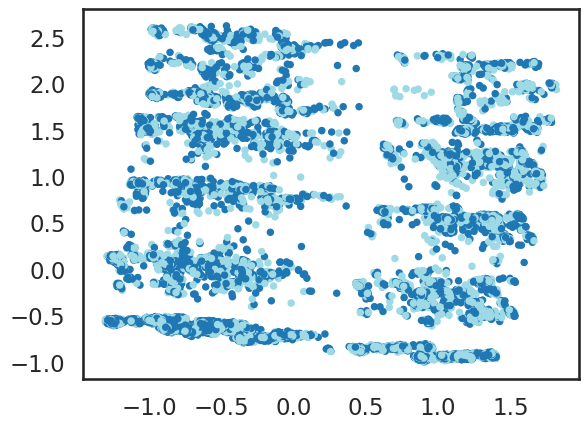

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3, whiten=True)
pca.fit(x_train)
test_2d = pca.fit_transform(x_test)
plt.scatter(test_2d[:,0],test_2d[:,1],s=15,c=y_test, cmap=plt.cm.tab20)

In [ ]:
X_train_pca = pca.transform(x_train)
X_test_pca = pca.transform(x_test)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_pca, y_train)
y_train_pred = clf.predict(X_train_pca)
y_test_pred = clf.predict(X_test_pca)
train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                 measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_error

train      test
accuracy   0.530730  0.533949
precision  0.532502  0.535633
recall     0.503617  0.510021
f1         0.517657  0.522513

##LR- Logistic Regression

'saga': This is an extension of the SAG solver that also supports L1 regularization. It is recommended for large datasets and problems with a large number of features. It can handle both L1 and L2 penalties and is suitable for multi-class classification.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='saga').fit(x_train, y_train)
y_test_pred_l1 = lr_l1.predict(x_test)
print("l1:", accuracy(y_test, y_test_pred_l1))

l1: 0.5892894266350671


In [ ]:
print(lr_l1.Cs_)
best_C = lr_l1.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 10000.0


In [ ]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='lbfgs').fit(x_train, y_train)
y_test_pred_l2 = lr_l2.predict(x_test)
print("l2:", accuracy(y_test, y_test_pred_l2))

l2: 0.5892894266350671


In [ ]:
print(lr_l2.Cs_)
best_C = lr_l2.C_[0]
print("Best C value:", best_C)

[1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]
Best C value: 10000.0


In [ ]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression- none regularization
lr_no_reg = LogisticRegression(C=100000).fit(x_train, y_train)
y_test_pred_lr_no_reg = lr_no_reg.predict(x_test)
print("lr_no_reg:", accuracy(y_test, y_test_pred_lr_no_reg))

lr_no_reg: 0.5893310049478192


In [ ]:
coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]
for lab,mod in zip(coeff_labels, coeff_models):
  print(lab, ":", np.max(np.abs(mod.coef_)))

l1 : 8.899081133587389
l2 : 8.868437861937114
lr_no_reg : 8.935802817267454


In [ ]:
coefficients = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0]], codes=[[0], [0]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

l1        l2 lr_no_reg
           0         0         0
16  0.000408 -0.017610 -0.046848
63 -0.000306 -0.028051 -0.112586
12 -0.027969 -0.044666 -0.077416
4   0.578111  0.578423  0.578316
60 -0.010141 -0.079808 -0.162830
42  0.027809  0.006564 -0.053752
43 -0.008983 -0.030168 -0.090425
23 -0.063545 -0.031520 -0.081373
66 -0.291054 -0.319439 -0.403006
54  0.185665  0.171190  0.092321

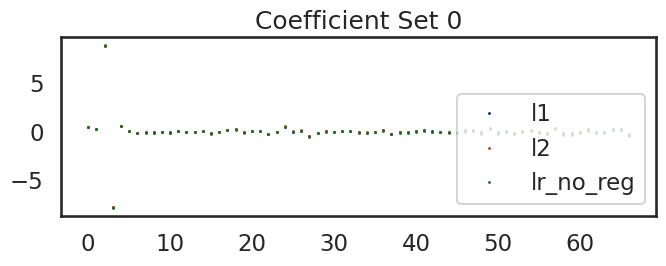

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 3)

data_ = coefficients.xs(0, level=1, axis=1)
data_.plot(marker='o', ls='', ms=1.0, ax=axList, legend=False)
axList.legend(loc=4)
axList.set(title='Coefficient Set 0')

plt.tight_layout()
plt.show()


In [ ]:
# Predict the class and the probability for each

y_pred = list()
y_prob = list()

coeff_labels = ['l1', 'l2','lr_no_reg']
coeff_models = [lr_l1, lr_l2, lr_no_reg]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(x_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(x_test).max(axis=1), name=lab))

y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

l1  l2  lr_no_reg
0   0   0          0
1   1   1          1
2   0   0          0
3   0   0          0
4   0   0          0

In [ ]:
y_prob.head()

l1        l2  lr_no_reg
0  0.633704  0.633800   0.634065
1  0.621756  0.621653   0.621830
2  0.527241  0.527219   0.527323
3  0.750590  0.750819   0.750747
4  0.694059  0.694306   0.694612

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')

    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])

    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1]),
              label_binarize(y_pred[lab], classes=[0,1]),
              average='weighted')

    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])

    metrics.append(pd.Series({'precision':precision, 'recall':recall,
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc},
                             name=lab))

metrics = pd.concat(metrics, axis=1)

metrics

l1        l2  lr_no_reg
precision  0.589297  0.589296   0.589338
recall     0.589289  0.589289   0.589331
fscore     0.589280  0.589281   0.589323
accuracy   0.589289  0.589289   0.589331
auc        0.589289  0.589289   0.589331

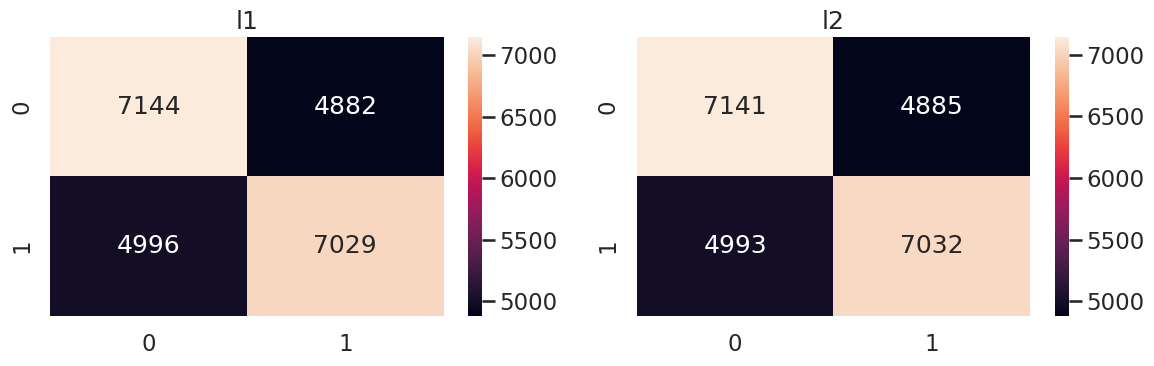

In [ ]:
fig, axList = plt.subplots(nrows=1, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 4)

#axList[-1].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);

plt.tight_layout()

##Naive bayes

In [ ]:
print(data.dtypes)

Accident_Severity         int64
Latitude                float64
Longitude               float64
Number_of_Casualties      int64
Number_of_Vehicles        int64
                         ...   
Road_Type_0             float64
Road_Type_1             float64
Road_Type_2             float64
Road_Type_3             float64
Road_Type_4             float64
Length: 68, dtype: object


MultinomialNB model knows to convert continuous data into discrete data.
BernoulliNB model doesn't do it in a good way.



In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import cross_val_score

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}
scores = {}
cv_N = 4
for key, model in nb.items():
    s = cross_val_score(model, x_data, y_data, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.5439576888534078,
 'bernoulli': 0.5780361241393075,
 'multinomial': 0.5559450154675183}

In [ ]:
#Fit a GaussianNB to the training split.
model = GaussianNB()
model.fit(x_train, y_train)

#Get predictions on the test set.
predictions = model.predict(x_test)

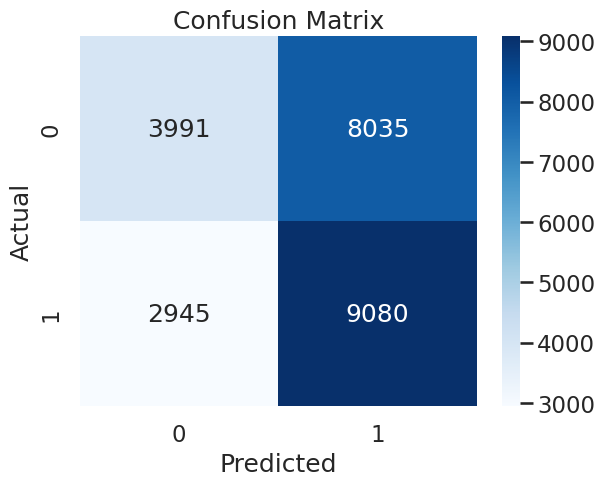

In [ ]:
#use sns.heatmap to plot the confusion matrix for predictions.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Fit a MultinomialNB to the training split.
model = MultinomialNB()
model.fit(x_train, y_train)

#Get predictions on the test set.
predictions = model.predict(x_test)

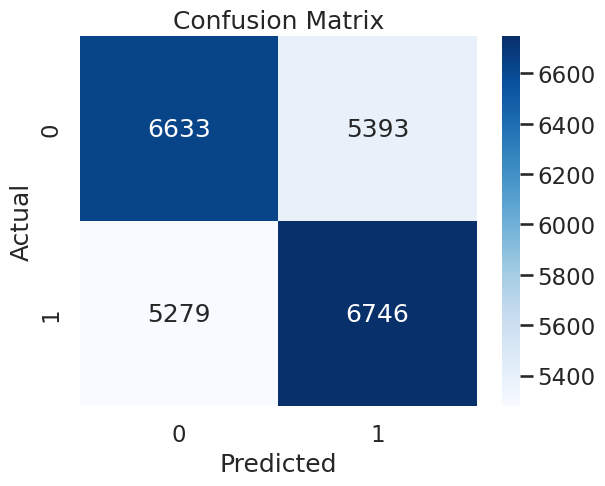

In [ ]:
#use sns.heatmap to plot the confusion matrix for predictions.
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create X_discrete from X using .rank(pct=True)
X_discrete = x_data.rank(pct=True)
X_discrete

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0      0.274511   0.919719              0.375879            0.179941   
1      0.613499   0.256985              0.938623            0.631480   
2      0.089038   0.101212              0.938623            0.631480   
3      0.256256   0.722489              0.375879            0.631480   
4      0.280230   0.853084              0.832471            0.631480   
...         ...        ...                   ...                 ...   
80163  0.272278   0.728508              0.375879            0.631480   
80164  0.038282   0.572086              0.375879            0.631480   
80165  0.191847   0.915827              0.832471            0.179941   
80166  0.174471   0.891465              0.375879            0.631480   
80167  0.302053   0.640405              0.375879            0.631480   

       Speed_limit      Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0         0.321307  0.695907  0.691916        0.498809        0.485917   
1         0.839762  0.533361  0.191916        0.498809        0.485917   
2         0.839762  0.695907  0.191916        0.498809        0.985917   
3         0.321307  0.533361  0.691916        0.498809        0.985917   
4         0.321307  0.401931  0.691916        0.498809        0.485917   
...            ...       ...       ...             ...             ...   
80163     0.321307  0.879528  0.691916        0.498809        0.485917   
80164     0.321307  0.695907  0.691916        0.498809        0.485917   
80165     0.321307  0.945084  0.191916        0.498809        0.485917   
80166     0.321307  0.834304  0.691916        0.498809        0.485917   
80167     0.321307  0.773775  0.691916        0.498809        0.485917   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0            0.610824  ...                    0.15601   
1            0.110824  ...                    0.65601   
2            0.110824  ...                    0.65601   
3            0.110824  ...                    0.15601   
4            0.610824  ...                    0.65601   
...               ...  ...                        ...   
80163        0.610824  ...                    0.65601   
80164        0.610824  ...                    0.15601   
80165        0.610824  ...                    0.65601   
80166        0.610824  ...                    0.65601   
80167        0.610824  ...                    0.65601   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                       0.499345                   0.482031   
1                       0.499345                   0.482031   
2                       0.499345                   0.482031   
3                       0.499345                   0.482031   
4                       0.499345                   0.482031   
...                          ...                        ...   
80163                   0.499345                   0.482031   
80164                   0.499345                   0.482031   
80165                   0.499345                   0.482031   
80166                   0.499345                   0.482031   
80167                   0.499345                   0.482031   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                       0.993376                   0.369268     0.429005   
1                       0.493376                   0.369268     0.429005   
2                       0.493376                   0.369268     0.429005   
3                       0.493376                   0.869268     0.429005   
4                       0.493376                   0.369268     0.429005   
...                          ...                        ...          ...   
80163                   0.493376                   0.369268     0.429005   
80164                   0.493376                   0.869268     0.429005   
80165                   0.493376                   0.369268     0.429005   
80166                   0.493376                   

In [ ]:
# Modify X_discrete so that it is indeed discrete
X_discrete = X_discrete.applymap(lambda x: int(round(x * 100)))  # Convert percentile ranks to integers (rounded) and extract first 2 digits
X_discrete

Latitude  Longitude  Number_of_Casualties  Number_of_Vehicles  \
0            27         92                    38                  18   
1            61         26                    94                  63   
2             9         10                    94                  63   
3            26         72                    38                  63   
4            28         85                    83                  63   
...         ...        ...                   ...                 ...   
80163        27         73                    38                  63   
80164         4         57                    38                  63   
80165        19         92                    83                  18   
80166        17         89                    38                  63   
80167        30         64                    38                  63   

       Speed_limit  Time  Is_Urban  Vehicle_Type_0  Vehicle_Type_1  \
0               32    70        69              50              49   
1               84    53        19              50              49   
2               84    70        19              50              99   
3               32    53        69              50              99   
4               32    40        69              50              49   
...            ...   ...       ...             ...             ...   
80163           32    88        69              50              49   
80164           32    70        69              50              49   
80165           32    95        19              50              49   
80166           32    83        69              50              49   
80167           32    77        69              50              49   

       Vehicle_Type_2  ...  Road_Surface_Conditions_0  \
0                  61  ...                         16   
1                  11  ...                         66   
2                  11  ...                         66   
3                  11  ...                         16   
4                  61  ...                         66   
...               ...  ...                        ...   
80163              61  ...                         66   
80164              61  ...                         16   
80165              61  ...                         66   
80166              61  ...                         66   
80167              61  ...                         66   

       Road_Surface_Conditions_1  Road_Surface_Conditions_2  \
0                             50                         48   
1                             50                         48   
2                             50                         48   
3                             50                         48   
4                             50                         48   
...                          ...                        ...   
80163                         50                         48   
80164                         50                         48   
80165                         50                         48   
80166                         50                         48   
80167                         50                         48   

       Road_Surface_Conditions_3  Road_Surface_Conditions_4  Road_Type_0  \
0                             99                         37           43   
1                             49                         37           43   
2                             49                         37           43   
3                             49                         87           43   
4                             49                         37           43   
...                          ...                        ...          ...   
80163                         49                         37           43   
80164                         49                         87           43   
80165                         49                         37           43   
80166                         49                         37           43   
80167                  

In [ ]:
# Split X_discrete and y into training and test datasets
X_train_discrete, X_test_discrete, y_train_discrete, y_test_discrete = train_test_split(X_discrete, y_data, test_size=0.3, random_state=42)
# Fit a MultinomialNB to the training split
model_discrete = MultinomialNB()
model_discrete.fit(X_train_discrete, y_train_discrete)

# Get predictions on the test set
predictions_discrete = model_discrete.predict(X_test_discrete)

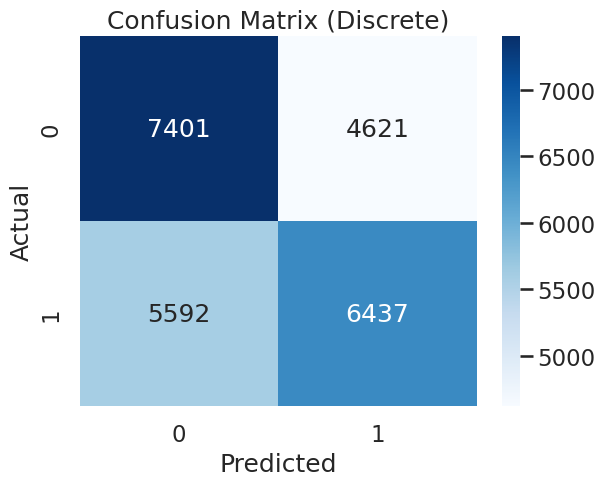

In [ ]:
# Plot the confusion matrix for predictions
conf_matrix_discrete = confusion_matrix(y_test_discrete, predictions_discrete)
sns.heatmap(conf_matrix_discrete, annot=True, fmt='d', cmap="Blues", xticklabels=model_discrete.classes_, yticklabels=model_discrete.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Discrete)')
plt.show()

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
print("node count: " ,dt.tree_.node_count,"max depth: ", dt.tree_.max_depth)

node count:  32245 max depth:  62


In [ ]:
# The error on the training and test data sets
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.541266
precision    1.0  0.541402
recall       1.0  0.539376
f1           1.0  0.540387

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0657018 to fit



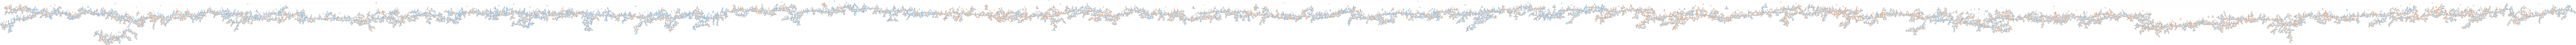

In [ ]:
from io import StringIO
from IPython.display import Image, display

from sklearn.tree import export_graphviz

try:
    import pydotplus
    pydotplus_installed = True

except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False
if pydotplus_installed:

    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    print(graph)
    # View the tree image
    filename = 'Car_Accidents_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)

else:
    print('This cell not executed because PyDotPlus could not be loaded.')

<Axes: >

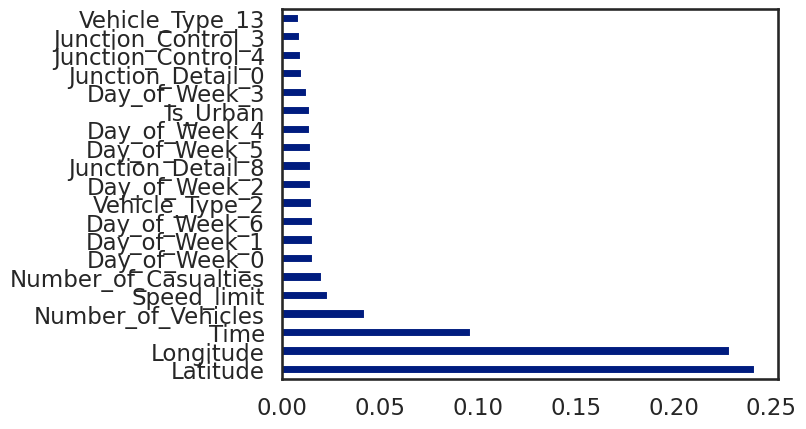

In [ ]:
feature_imp = pd.Series(dt.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_imp.nlargest(20).plot(kind='barh')

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(x_train, y_train)
print("node count: " ,GR.best_estimator_.tree_.node_count,"max depth: ",  GR.best_estimator_.tree_.max_depth)

node count:  225 max depth:  7


In [ ]:
y_train_pred = GR.predict(x_train)
y_test_pred = GR.predict(x_test)

train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                 measure_error(y_test, y_test_pred, 'test')],
                                axis=1)
train_test_error

train      test
accuracy   0.618511  0.607251
precision  0.627752  0.615952
recall     0.582380  0.569647
f1         0.604215  0.591895

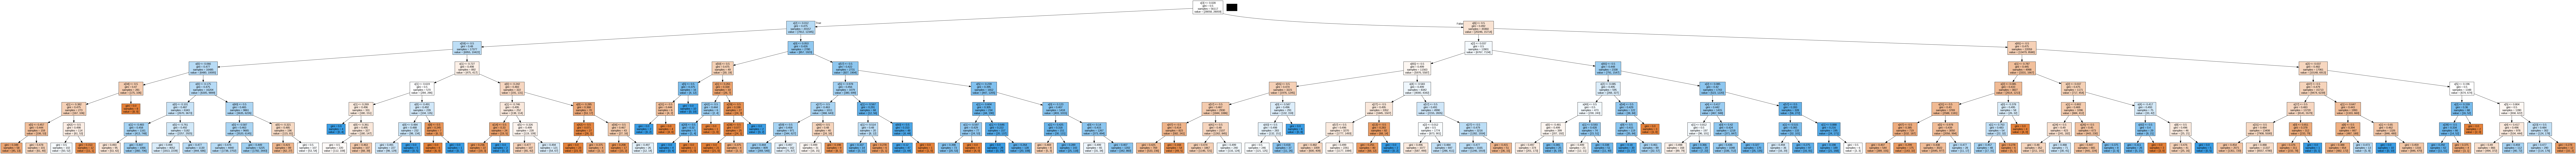

In [ ]:
try:
    import pydotplus
    pydotplus_installed = True

except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False
if pydotplus_installed:

    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'Car_Accidents_tree_prune.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)

else:
    print('This cell not executed because PyDotPlus could not be loaded.')

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(x_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_

    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

oob
n_trees          
15.0     0.444482
20.0     0.438263
30.0     0.430547
40.0     0.428551
50.0     0.424631
100.0    0.418964
150.0    0.416416
200.0    0.416861
300.0    0.413190
400.0    0.412460

[Text(0, 0.5, 'oob error')]

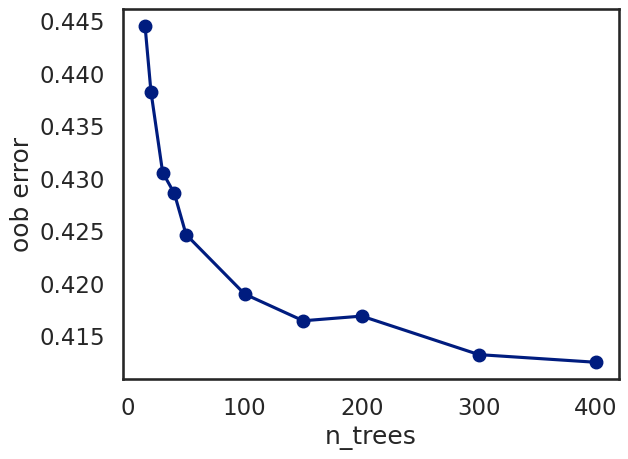

In [ ]:
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='oob error')

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True,
                          random_state=42,
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(x_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

oob
n_trees          
15.0     0.455477
20.0     0.452661
30.0     0.445462
40.0     0.442807
50.0     0.439403
100.0    0.436089
150.0    0.434200
200.0    0.434022
300.0    0.431866
400.0    0.431937

In [ ]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

RandomForest  ExtraTrees
n_trees                          
15.0         0.444482    0.455477
20.0         0.438263    0.452661
30.0         0.430547    0.445462
40.0         0.428551    0.442807
50.0         0.424631    0.439403
100.0        0.418964    0.436089
150.0        0.416416    0.434200
200.0        0.416861    0.434022
300.0        0.413190    0.431866
400.0        0.412460    0.431937

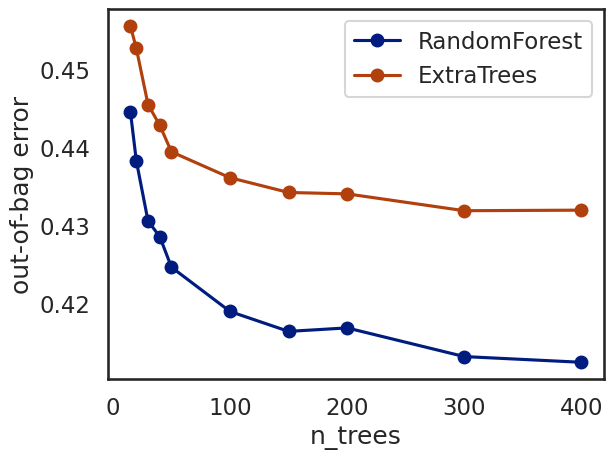

In [ ]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

ax = oob_df.plot(marker='o')
ax.set(ylabel='out-of-bag error');

##Summary

Trying different combinations of classifications -> About 50% success

(2 classifications) -> Random prediction.